### 1. Importing Libraries 

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
from matplotlib import pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# to suppress warnings
import warnings
warnings.filterwarnings("ignore") 

### 2. Importing and Exploration of the dataset

In [2]:
# loading the data and setting the unique client_id as the index::

df = pd.read_csv('loans.csv', index_col = 'client_id')

In [3]:
# # showing the first 5 rows of the dataset:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [4]:
# To check the Dimensions of the dataset:
df.shape

(443, 7)

In [5]:
# Checking the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


### 3. Checking the datatypes of the columns

In [6]:
df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

### 4. Converting the data types of columns

    - loan_id to object
    - repaid to category dtype
    - loan_start and loan_end to date type

In [7]:
# loan_id:

df['loan_id'] = df['loan_id'].astype('object')

# repaid:

df['repaid'] = df['repaid'].astype('category')

In [8]:
df.dtypes

loan_type        object
loan_amount       int64
repaid         category
loan_id          object
loan_start       object
loan_end         object
rate            float64
dtype: object

In [9]:
# loan_start:

df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')


# loan_end:

df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

#### Checking the datatypes again:

In [10]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### 5. Summary Statistics of the data

In [11]:
# Summary Statistics for Numerical data:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [12]:
# Summary Statistics for Categorical data:
df.describe(include='all')

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
count,443,443.000000,443.0,443.0,443,443,443.000000
unique,4,NaN,2.0,443.0,430,428,NaN
top,home,NaN,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00,NaN
freq,121,NaN,237.0,1.0,2,2,NaN
first,NaN,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00,NaN
mean,NaN,7982.311512,NaN,NaN,NaN,NaN,3.217156
std,NaN,4172.891992,NaN,NaN,NaN,NaN,2.397168
min,NaN,559.000000,NaN,NaN,NaN,NaN,0.010000
25%,NaN,4232.500000,NaN,NaN,NaN,NaN,1.220000


### 6. Missing Values

In [13]:
# use isnull().sum() to check for missing values 
df.isnull().sum() 

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

### 7. Outliers Treatment

To check for the presence of outliers, we plot Boxplot.

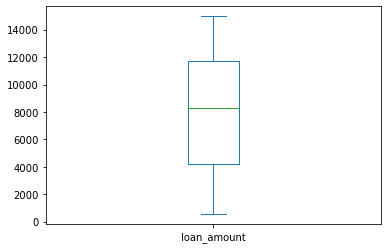

In [14]:
# For loan_amount 
df['loan_amount'].plot(kind='box')
plt.show()

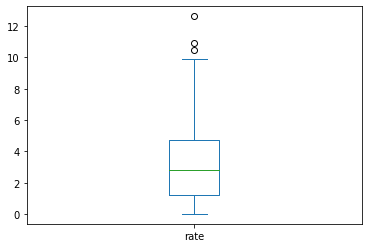

In [15]:
# For rate 
df['rate'].plot(kind='box')
plt.show()

We can see that there are no outliers in the loan_amount column and some outliers are present in the rate column. To treat for outliers can either cap the values or transform the data. Shall demonstrate both the approaches here. 

### 8. Transformation

### 8a. SQRT transformation 

In [16]:
df['SQRT_RATE'] = df['rate']**0.5

In [17]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [18]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


In [19]:
#checking the skewness, kurtosis between the original and transformed data:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))

The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862


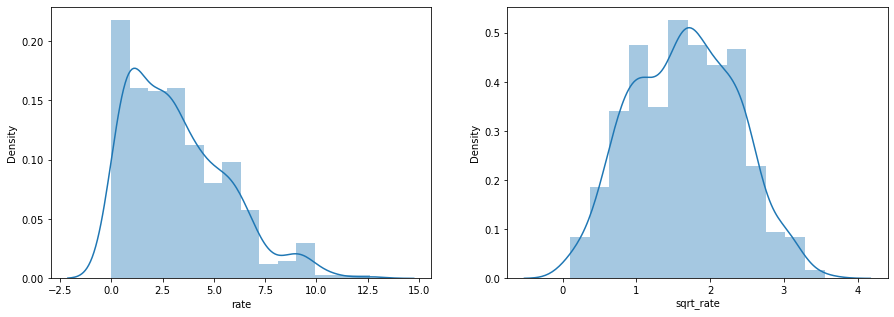

In [20]:
# plotting the distribution

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()


### 8b. Log Transformation

In [21]:
df['Log Rate'] = np.log(df['rate'])

In [22]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [23]:
print("The skewness of the original data is {}".format(df.rate.skew()))
print('The skewness of the SQRT transformed data is {}'.format(df.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(df['Log Rate'].skew()))


The skewness of the original data is 0.884204614329943
The skewness of the SQRT transformed data is 0.04964154055528862
The skewnss of the LOG transformed data is -1.5943217626331552


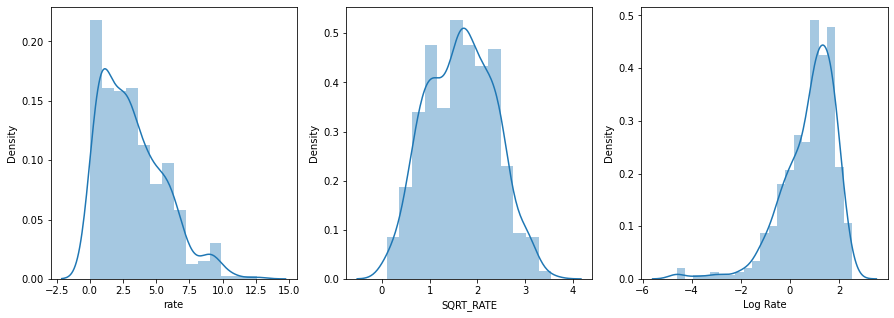

In [24]:
# plot the graph:

fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()

### Inference:

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable. 

There are other transformations available also called BoxCox. There is an inbuilt function in Sci-kit Learn library called PowerTransformer for this which can also be called to transform the data. We'll see how it works below. Its sklearn domcumentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html


-----------

### Outliers Treatment using Capping Approach

### 2) IQR Method to treat Outliers:

All the values below Q1 - 1.5*IQR and values above Q3 + 1.5*IQR are outliers and can be removed.

In [25]:
# finding the Quantiles:

Q1 = df.rate.quantile(0.25)
Q2 = df.rate.quantile(0.50)
Q3 = df.rate.quantile(0.75)

# IQR : Inter-Quartile Range

IQR = Q3 - Q1

# Lower Limit:
LC = Q1 - (1.5*IQR)

# Upper Limit:
UC = Q3 + (1.5*IQR)

display(LC)
display(UC)

-4.075

10.045

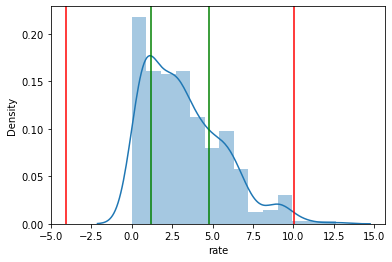

In [26]:
## Plot

sns.distplot(df.rate)
plt.axvline(UC, color='r')
plt.axvline(LC, color ='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')
plt.show()

In [27]:
# Find count of Outliers wrt IQR

df[(df.rate<LC) | (df.rate>UC)].reset_index(drop=True)

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
0,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.238827,3.238827,2.350422
1,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.300000,3.300000,2.387845
2,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.552464,3.552464,2.535283


In [28]:
df[(df.rate<LC) | (df.rate>UC)].shape[0]

3

In [29]:
## Store the clean data wrt IQR:
df4 = df[(df.rate>LC) & (df.rate<UC)]
df4.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [30]:
df.shape

(443, 10)

In [31]:
df4.shape

(440, 10)

#### Interpretation: 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

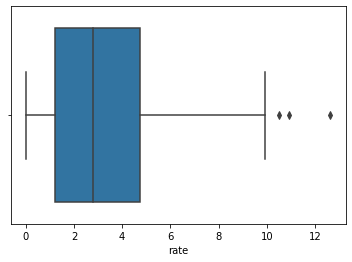

In [32]:
## Box Plot for rate--- based on IQR Method

sns.boxplot(df.rate)
plt.show()

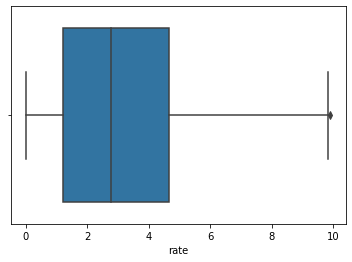

In [33]:
# Box Plot for rate --- based on Z-score cleaned data 

sns.boxplot(df4.rate)
plt.show()

### 9. Scaling the Numerical Features

There are two ways to scale the data: 

1) Standardization (Z-Score)\
2) Normalization: Min Max Scalar

Both can by done manually as well as have in-built functions in sklearn. Will demonstrate both.

### 9a. Standardization (Z-Score)

Scales the data using the formula (x-mean)/standard deviation

#### Manually:

In [34]:
# for Rate :
avg_rate = df4['rate'].mean()
avg_rate

3.161818181818183

In [35]:
std_rate = df4['rate'].std()
std_rate

2.307947418822915

In [36]:
# Step 1 : transform using Z-score
df4['Z_Score_Rate'] = (df4['rate'] - avg_rate)/std_rate

In [37]:
df4.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,Z_Score_Rate
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,-0.438406
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,-0.828363
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-1.075336
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,-0.832696
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,-0.013786


In [38]:
# For Loan_amount:
avg_LA = df4['loan_amount'].mean()
avg_LA

7997.195454545455

In [39]:
std_LA = df4['loan_amount'].std()
std_LA

4179.435966237437

In [40]:
# Step 1 : transform using Z-score
df4['Z_Score_LA'] = (df4['loan_amount'] - avg_LA)/std_LA

In [41]:
df4.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,Z_Score_Rate,Z_Score_LA
client_id,,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,-0.438406,1.357792
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,-0.828363,0.429916
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-1.075336,1.133360
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,-0.832696,1.081678
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,-0.013786,1.447996


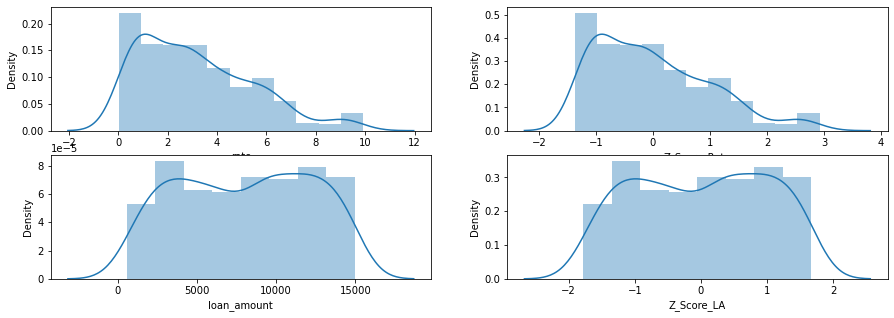

In [42]:
# Distribution of the columns

fig, axes = plt.subplots(2,2, figsize=(15,5))

sns.distplot(df4['rate'], ax=axes[0,0])
sns.distplot(df4['Z_Score_Rate'], ax=axes[0,1])
sns.distplot(df4['loan_amount'], ax=axes[1,0])
sns.distplot(df4['Z_Score_LA'], ax=axes[1,1])


plt.show()

#### By SkLearn:

Documentation for Standard Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [46]:
# Loans data:

df5 = df4.copy()
df5.drop(columns = ['Z_Score_Rate'], inplace=True)
df5.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,Z_Score_LA
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,1.357792
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.429916
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,1.133360
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,1.081678
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.447996


In [45]:
from sklearn.preprocessing import StandardScaler

In [47]:
df5

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,Z_Score_LA
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,1.357792
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.429916
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,1.133360
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,1.081678
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.447996
...,...,...,...,...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,1.568439,1.568439,0.900161,1.188152
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,2.295648,2.295648,1.662030,-1.500010
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,2.376973,2.376973,1.731656,0.318657


In [48]:
SS = StandardScaler()

scaled_x = SS.fit_transform(df5['loan_amount'])
scaled_x

ValueError: Expected 2D array, got 1D array instead:
array=[13672.  9794. 12734. 12518. 14049.  6935.  6177. 12656. 11062.  4050.
  1618.  8406.  9057.  3524. 10853.  7339. 11953. 10067. 12009.   559.
 13010.  3851.  8419. 11799. 10422. 14971.  4131.  4458.  8172. 14946.
 13618.  7061.  9580. 11434. 10982. 11597. 14074. 10519. 14388.  8354.
  3812.  3332.  3952. 14290. 12581. 10967.  8624. 14399.  4922.  6903.
  4491.  9766.  9302.   921. 11154. 12934. 11016. 10773.   811.  3022.
  9282. 14007.  5943.  3834.  7020.  9216.  6985. 14081.  8643. 12325.
 11679.  2628. 11761.  6512.  8320.  1607.  5362.  2569.  9221. 12048.
 11403.  2477.  2203. 10422.  5200.  9942.  8267. 13913.  1212.  4025.
  2735. 12623.  9905.  5265. 10636. 11467.  5467. 13698.  6371. 13006.
  9600.  4108. 11647. 14575. 12596.  2274.  6484.  1918.  2865.  4463.
  3351. 10436.  3875.  2778. 13115. 10333.   904. 12991.  7162.  9562.
  3576. 11846.  3540.  9141.  2830. 11911.  5325.  5036. 10671.  2418.
 14522.   851.  5804.  1710.  3754.  1234.  7499. 14802.   773.  9175.
 13194.  1543. 10017.  8576.  5204.  6263.  3703.  2932.  6048. 10947.
  4489. 11854. 12888.  2568.  6336.  6462. 10080.  5732. 11873. 14767.
 13309. 11356.  5236.  3743.  6352.  9389.   667.  3852.  1887.  7738.
  7567.  6513.  5250. 10800.  4953.  3872.   809. 12216.  7237.  6521.
 12592.  1383. 14740.  5818.   659.  7813.  7907.  2797.  8703.  4112.
 11066. 10830. 14006.  5536. 10902.  1164. 13264.  8794.  5275. 12377.
  4856. 10261. 13464. 12760.  3083.  6147.  2847.  1411.  3597.  6119.
  8090. 13643.  5784.  5974.  8517.  3241.  8367.  7906. 12090.  9498.
  2877.  1136. 13887.  3851.  1070.  2275. 14257.  9237.  2630.  4964.
  1732. 13783.  6000. 12553.  2380. 14784. 13674. 11901.  4239.  1693.
  7294. 10602.  2778.  8223. 13862. 13683.  4241. 14623.  6012. 10499.
 14703.  9115.  4718. 14837. 13164.  7223. 14721. 10537.  4301.  9394.
  4475.  7005.  6636.  8635.  5478. 14104. 10120.  2003.  9532.  5085.
  6129.  7232.  6821.  4930.  1221. 12571.  3376. 11175.  4625.  6232.
  4379. 11050. 12291.  9646. 11649.  4949. 11142. 10305. 11886. 12408.
 11538.  3704. 14162. 11783.  7914.  4675.  2105. 10082. 12085.  4226.
  7056.  6473.  5155.  9534.  6620.  2106.  1447. 13910. 13789.  5765.
  6885. 13338. 11871. 14900.  5508.  2623. 12465.  8770. 12312.  2559.
  9893.  3017. 12799.  7279.  6858.  6562.  4506.   765. 10779.  8506.
  5263.  9582.  1770.  2166.  2925.  3557. 14654.  8646. 10022.  7241.
  1825.  9554. 13131. 10758. 11728.  6634. 10703.  2389.  3504.  9808.
  9606.  3915. 13918.  8846. 11763. 10022. 10378. 13269.  2650.  3660.
 14865.  4698.  3455.  9323.  4776.  3418.  9349. 14639. 14804.  2525.
  2396. 12551.  8797. 14342.  5776.  2451. 14637.  9355.  4643.  9457.
 13130. 10498.  6596. 12139. 10377.  9069.  2737.  8308.  9641.  2390.
 12575. 13187.  7372. 12586. 14942.   986.  5095.  8597.  1270. 12571.
  5758.  7779. 13657. 11222. 13082. 10122.  6661. 11773.  1968.  4078.
  5554. 14679.  2572.  8621. 13221. 11219. 11943.  2361.  9296.  6050.
 13015.  7876.  2461. 14421. 11750.  6010.  8337.  9249.  8899.  1367.
  8685.  3510.   653. 13726. 14593. 12963.  1728.  9329.  4197.  3643.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 6b.  Normalization: Min Max Scalar

Scales the data using the formula (x - min)/(max - min)

#### Manually:

In [72]:
# ForeRate:
min_rate = df5.rate.min()
min_rate

0.01

In [73]:
max_rate = df5.rate.max()
max_rate

9.91

In [74]:
df5['Min_Max_R'] = (df5['rate'] - min_rate)/ (max_rate - min_rate)

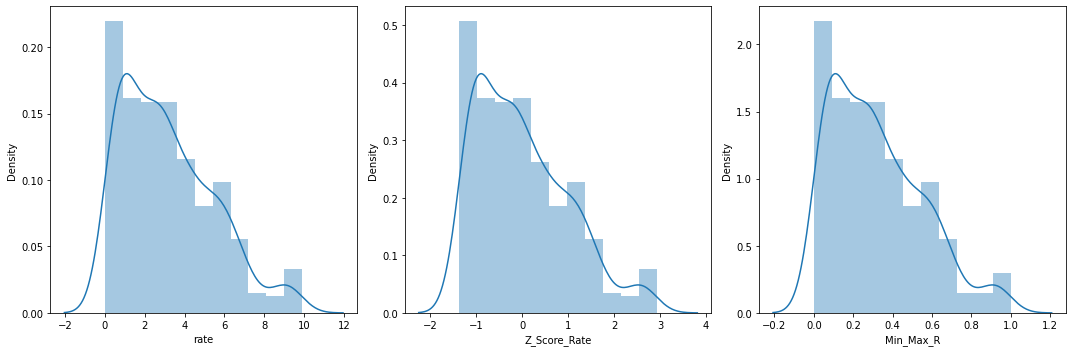

In [76]:
# Distribution of the columns

# For Rate

fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df4['rate'], ax=axes[0])
sns.distplot(df4['Z_Score_Rate'], ax=axes[1])
sns.distplot(df5['Min_Max_R'], ax=axes[2])

plt.tight_layout()
plt.show()

#### By Sklearn:

Documentation for Min Max Scaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
MS = MinMaxScaler()

MinMaxScaled = MS.fit_transform(df5_num)
MinMaxScaled

array([[9.09866778e-01, 1.69706582e-01],
       [6.40785457e-01, 9.83346550e-02],
       [8.44782126e-01, 5.31324346e-02],
       [8.29794616e-01, 9.75416336e-02],
       [9.36025534e-01, 2.47422680e-01],
       [4.42409104e-01, 1.53053132e-01],
       [3.89814044e-01, 7.50991277e-01],
       [8.39369969e-01, 3.27517843e-01],
       [7.28767694e-01, 4.33782712e-01],
       [2.42228698e-01, 3.37034100e-01],
       [7.34804330e-02, 5.13877875e-01],
       [5.44476825e-01, 3.88580492e-02],
       [5.89647516e-01, 6.74068200e-02],
       [2.05731335e-01, 4.73433783e-01],
       [7.14265890e-01, 2.22839017e-01],
       [4.70441299e-01, 1.01506741e-01],
       [7.90591174e-01, 2.60904044e-01],
       [6.59728004e-01, 2.46629659e-01],
       [7.94476825e-01, 6.18556701e-02],
       [0.00000000e+00, 3.28310864e-01],
       [8.63932834e-01, 1.53053132e-01],
       [2.28420760e-01, 6.34417129e-02],
       [5.45378851e-01, 6.50277557e-02],
       [7.79905634e-01, 5.16256939e-01],
       [6.843602

### 10. Encoding the Categorical Features

There are two ways to encode the categorical data into dummyvariables. Using: 

1) pd.get_dummies\
2) sklearn's in-built function of OneHotEncoder and LabelEncoder

In [82]:
# Loans data:

df_loans = df4.copy()

In [83]:
df_loans.drop(columns = ['Z_Score_Rate'], inplace=True)
df_loans.drop(columns = ['Z_Score_LA'], inplace=True)

In [84]:
df_loans.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


In [85]:
df_loans.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
SQRT_RATE             float64
sqrt_rate             float64
Log Rate              float64
dtype: object

In [86]:
# Repaid is also a categoriy columns and creating dummies for loan_type
df_loans.repaid.head()

client_id
46109    0
46109    0
46109    1
46109    1
46109    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

### 1) pd.get_dummies approach:

In [87]:
dummy_cat = pd.get_dummies(df_loans['loan_type'], drop_first = True)
dummy_cat.head()

# drop_first = True drops the first column for each feature

,credit,home,other
client_id,,,
46109,0,1,0
46109,1,0,0
46109,0,1,0
46109,0,0,0
46109,1,0,0


### 11. Creating new Derived Features

We can use the loan_start and loan_end features to calculate the tenure of the loan

In [94]:
import datetime as dt

In [97]:
df_loans['loan_tenure'] =  df_loans['loan_end'] - df_loans['loan_start']

In [98]:
df_loans.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,loan_tenure
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,613 days
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,635 days
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,519 days
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,879 days
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,684 days


In [99]:
df_loans.dtypes

loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
SQRT_RATE              float64
sqrt_rate              float64
Log Rate               float64
loan_tenure    timedelta64[ns]
dtype: object

The number of days in the tenure are currently in TimeDelta, we want it integer hence will do the conversion as follows:

In [100]:
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days
df_loans['loan_tenure']

client_id
46109    613
46109    635
46109    519
46109    879
46109    684
        ... 
26945    928
26945    511
26945    948
26945    633
26945    638
Name: loan_tenure, Length: 440, dtype: int64

### 12. Training and Testing data

Documentation for this: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
## Splitting for X and Y variables:

Y = df_loans['loan_amount']
X = df_loans.drop('loan_amount', axis=1)

In [104]:
# Independent Variable

X.head()

,loan_type,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,loan_tenure
client_id,,,,,,,,,,
46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,1.679452
46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,1.739726
46109,home,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,1.421918
46109,cash,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,2.408219
46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.873973


In [105]:
# Dependent or Target Variable

Y.head()

client_id
46109    13672
46109     9794
46109    12734
46109    12518
46109    14049
Name: loan_amount, dtype: int64

In [106]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

# random_state ---> is seed -- fixing the sample selection for Training & Testing dataset

# check the dimensions of the train & test subset for 

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (352, 10)
The shape of X_test is: (88, 10)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)
